<a href="https://colab.research.google.com/github/komalchilke/cpp-programs/blob/main/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print ("**********************************************************\n")
print ("Name of Program: Fit a Support Vector Machine (SVM) Classifier on any standard data set \n")
print("Performed By: komal chilke \n")
print ("Roll No.: BE21F06F014\n")
print ("**********************************************************\n")

**********************************************************

Name of Program: Fit a Support Vector Machine (SVM) Classifier on any standard data set 

Performed By: komal chilke 

Roll No.: BE21F06F014

**********************************************************



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv("/content/p8Dataset.csv")
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [ ]:
X=dataset.iloc[:,2:4]
y=dataset.iloc[:,-1]


In [ ]:
print(X)
print(y)

     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]
0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print("After scaling : training data(X)")
print(X)

After scaling : training data(X)
     Age  EstimatedSalary
0     19            19000
1     35            20000
2     26            43000
3     27            57000
4     19            76000
..   ...              ...
395   46            41000
396   51            23000
397   50            20000
398   36            33000
399   49            36000

[400 rows x 2 columns]


In [ ]:
#fitting SVM to Training set
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0)
classifier.fit(X_train,y_train)

SVC(random_state=0)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
print("Predicted value")
print(y_pred)

Predicted value
[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 0 1 0 0 0 0 0 1 1 1]


In [ ]:
#make confusion matrix
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print("Confusion metrix: ")
print(cm)

Confusion metrix: 
[[64  4]
 [ 3 29]]


In [ ]:
#calculating accuracy score
ac = accuracy_score(y_test,y_pred)
print("Accuracy score:")
print(ac*100,"%")

Accuracy score:
93.0 %


(-2.5825424477554755, 3.3274575522443985)

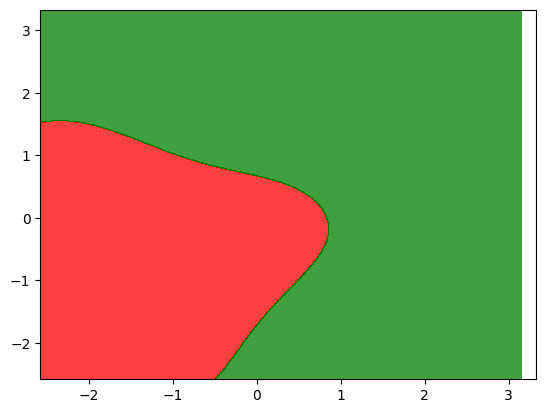

In [ ]:
#visualize test results
from matplotlib.colors import ListedColormap
X_set,y_set = X_test,y_test
X1,X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1,stop = X_set[:,0].max()+1,step=0.01),
                   np.arange(start=X_set[:,1].min()-1,stop = X_set[:,1].max()+1,step=0.01))
plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T).reshape(X1.shape),
             alpha=0.75, cmap = ListedColormap(('red','green')))
plt.xlim(X1.min(),X1.max())
plt.xlim(X2.min(),X2.max())

<ipython-input-39-6551f209444e>:2: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set ==j,0],X_set[y_set==j,1],


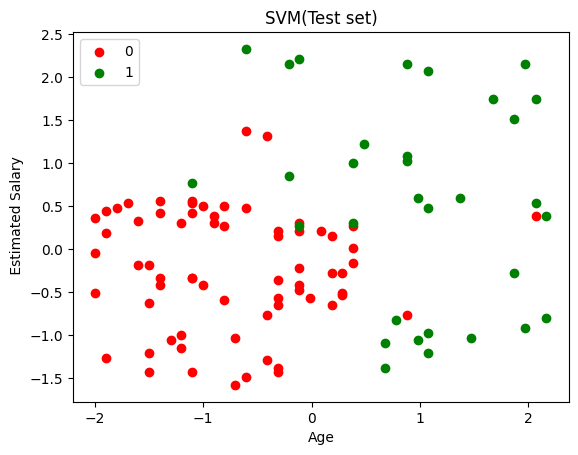

In [ ]:
for i,j in enumerate(np.unique(y_set)):
  plt.scatter(X_set[y_set ==j,0],X_set[y_set==j,1],
              c=ListedColormap(('red','green'))(i),label=j)
plt.title("SVM(Test set)")
plt.xlabel("Age")
plt.ylabel(' Estimated Salary')
plt.legend()
plt.show()